In [1]:
import scanpy as sc
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
import tools.rapids_modified as rp

In [3]:
adata = sc.read("/gstore/data/dld1_concerto/scTE/NGS5368_humanAPC/raw_qc.h5ad") 

In [4]:
adata

AnnData object with n_obs × n_vars = 30593 × 36603
    obs: 'Sample', 'Barcode', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'Treatment', 'Cellline', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase', 'SCN_class'
    var: 'ID', 'Symbol', 'Type', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: '.internal'
    layers: 'counts'

In [5]:
adata.obs

,Sample,Barcode,DemuxType_hashing,DemuxAssignment_hashing,Treatment,Cellline,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass,S_score,G2M_score,phase,SCN_class
SAM24437819_rep1-AAACCCAAGTAGTGCG,SAM24437819_rep1,AAACCCAAGTAGTGCG,singlet,SKCO1_Day6,Day6,SKCO1,2888,8414,350,4.159734,2623,31.174233,True,-0.655039,-0.473678,G1,NaN
SAM24437819_rep1-AAACCCACAATGGCCC,SAM24437819_rep1,AAACCCACAATGGCCC,singlet,DLD1_Day6,Day6,DLD1,2925,7547,91,1.205777,1003,13.290049,True,-0.701550,-0.500681,G1,NaN
SAM24437819_rep1-AAACCCACAGGCCCTA,SAM24437819_rep1,AAACCCACAGGCCCTA,singlet,CX1_Day6,Day6,CX1,4278,14195,743,5.234237,3068,21.613244,True,-0.864341,1.257959,G2M,NaN
SAM24437819_rep1-AAACCCACATGTGGTT,SAM24437819_rep1,AAACCCACATGTGGTT,singlet,HT55_Control,Control,HT55,2063,5538,253,4.568436,1722,31.094258,True,-0.391473,-0.283290,G1,NaN
SAM24437819_rep1-AAACCCACATTCACAG,SAM24437819_rep1,AAACCCACATTCACAG,singlet,SW1417_Control,Control,SW1417,2763,7156,468,6.539966,1452,20.290665,True,0.170543,0.377431,G2M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24437819_rep2-TTTGTTGGTACAATAG,SAM24437819_rep2,TTTGTTGGTACAATAG,singlet,SKCO1_Control,Control,SKCO1,2249,6342,270,4.257332,2162,34.090192,True,-0.527132,-0.526137,G1,NaN
SAM24437819_rep2-TTTGTTGGTTGTTGTG,SAM24437819_rep2,TTTGTTGGTTGTTGTG,singlet,CX1_Control,Control,CX1,2335,6262,376,6.004471,2080,33.216225,True,-0.527132,-0.461043,G1,NaN
SAM24437819_rep2-TTTGTTGTCAGACTGT,SAM24437819_rep2,TTTGTTGTCAGACTGT,singlet,SW1417_Day10,Day10,SW1417,1678,4291,69,1.608017,1360,31.694244,True,-0.360465,0.342500,G2M,NaN
SAM24437819_rep2-TTTGTTGTCGGAGTAG,SAM24437819_rep2,TTTGTTGTCGGAGTAG,singlet,RCM1_Control,Control,RCM1,1695,4702,322,6.848150,1841,39.153552,True,-0.383721,-0.397002,G1,NaN


## Add scTE data to the adata.obs

In [6]:
df = pd.read_csv("/gstore/data/dld1_concerto/scTE/NGS5368_humanAPC/scTE.csv", index_col=0)

In [7]:
df

,(CATTC)n,(GAATG)n,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,...,ZYG11B,ZYX,ZYXP1,ZZEF1,Zaphod,Zaphod2,Zaphod3,hAT-16_Crp,hAT-N1_Mam,hsa-mir-1253
SAM24437819_rep1-AAACCCAAGTAGTGCG,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
SAM24437819_rep1-AAACCCACAATGGCCC,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
SAM24437819_rep1-AAACCCACAGGCCCTA,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
SAM24437819_rep1-AAACCCACATGTGGTT,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
SAM24437819_rep1-AAACCCACATTCACAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24437819_rep2-TTTGTTGGTACAATAG,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
SAM24437819_rep2-TTTGTTGGTTGTTGTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAM24437819_rep2-TTTGTTGTCAGACTGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAM24437819_rep2-TTTGTTGTCGGAGTAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
df.loc['total'] = df.sum(numeric_only=True, axis=0)

In [9]:
df.loc['total'].sort_values(ascending=False).head(10)

AluSx     2817170
AluSx1    2813114
MT-CO2    2812176
AluJb     2638162
AluY      2603029
AluSz     2599549
RPLP1     2391048
MALAT1    2250472
RPS8      1987004
RPL39     1911505
Name: total, dtype: int64

In [10]:
merged_df = adata.obs.join(df, how='left')

In [11]:
merged_df

,Sample,Barcode,DemuxType_hashing,DemuxAssignment_hashing,Treatment,Cellline,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,...,ZYG11B,ZYX,ZYXP1,ZZEF1,Zaphod,Zaphod2,Zaphod3,hAT-16_Crp,hAT-N1_Mam,hsa-mir-1253
SAM24437819_rep1-AAACCCAAGTAGTGCG,SAM24437819_rep1,AAACCCAAGTAGTGCG,singlet,SKCO1_Day6,Day6,SKCO1,2888,8414,350,4.159734,...,0,1,0,0,0,0,0,0,0,0
SAM24437819_rep1-AAACCCACAATGGCCC,SAM24437819_rep1,AAACCCACAATGGCCC,singlet,DLD1_Day6,Day6,DLD1,2925,7547,91,1.205777,...,1,0,0,0,0,0,0,0,0,0
SAM24437819_rep1-AAACCCACAGGCCCTA,SAM24437819_rep1,AAACCCACAGGCCCTA,singlet,CX1_Day6,Day6,CX1,4278,14195,743,5.234237,...,0,1,0,0,0,0,0,0,0,0
SAM24437819_rep1-AAACCCACATGTGGTT,SAM24437819_rep1,AAACCCACATGTGGTT,singlet,HT55_Control,Control,HT55,2063,5538,253,4.568436,...,0,0,0,0,1,0,0,0,0,0
SAM24437819_rep1-AAACCCACATTCACAG,SAM24437819_rep1,AAACCCACATTCACAG,singlet,SW1417_Control,Control,SW1417,2763,7156,468,6.539966,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24437819_rep2-TTTGTTGGTACAATAG,SAM24437819_rep2,TTTGTTGGTACAATAG,singlet,SKCO1_Control,Control,SKCO1,2249,6342,270,4.257332,...,0,1,0,0,0,0,0,0,0,0
SAM24437819_rep2-TTTGTTGGTTGTTGTG,SAM24437819_rep2,TTTGTTGGTTGTTGTG,singlet,CX1_Control,Control,CX1,2335,6262,376,6.004471,...,0,0,0,0,0,0,0,0,0,0
SAM24437819_rep2-TTTGTTGTCAGACTGT,SAM24437819_rep2,TTTGTTGTCAGACTGT,singlet,SW1417_Day10,Day10,SW1417,1678,4291,69,1.608017,...,0,0,0,0,0,0,0,0,0,0
SAM24437819_rep2-TTTGTTGTCGGAGTAG,SAM24437819_rep2,TTTGTTGTCGGAGTAG,singlet,RCM1_Control,Control,RCM1,1695,4702,322,6.848150,...,0,0,0,0,1,0,0,0,0,0


In [12]:
adata.obs= merged_df.copy()

## UMAP Visualization

In [14]:
RP = rp.RapidsSingleCellPipeline(adata)

In [15]:
RP.proc(2000, norm=True, scale=True, regress=False, embedding=True,
                 n_components=50, n_neighbors=10, knn_n_pcs=30, batch_key=None, filtered= False)

Filtering cells.
Processed 0 cells..
Filtering genes and normalizing data.
Filtering to highly variable genes.
Processed 0 genes..
Processed 1200 genes..
Processed 2400 genes..
Processed 3600 genes..
Processed 4800 genes..
Processed 6000 genes..
Processed 7200 genes..
Processed 8400 genes..
Processed 9600 genes..
Processed 10800 genes..
Processed 12000 genes..
Processed 13200 genes..
Processed 14400 genes..
Processed 15600 genes..
Processed 16800 genes..
Processed 18000 genes..
Processed 19200 genes..
Processed 20400 genes..
Processed 21600 genes..
Processed 22800 genes..
Processed 24000 genes..
Processed 25200 genes..
Processed 26400 genes..
Processed 27600 genes..
Completed preprocessing.
Converting sparse GPU array to dense GPU array.
Preprocessing took 88.22545337677002 seconds
scaling
scaling took 0.628652811050415 seconds
computing PCA
PCA took 10.922409296035767 seconds
kNN took 9.622025966644287 seconds
computing UMAP
UMAP took 1.2567417621612549 seconds
computing Leiden cluste

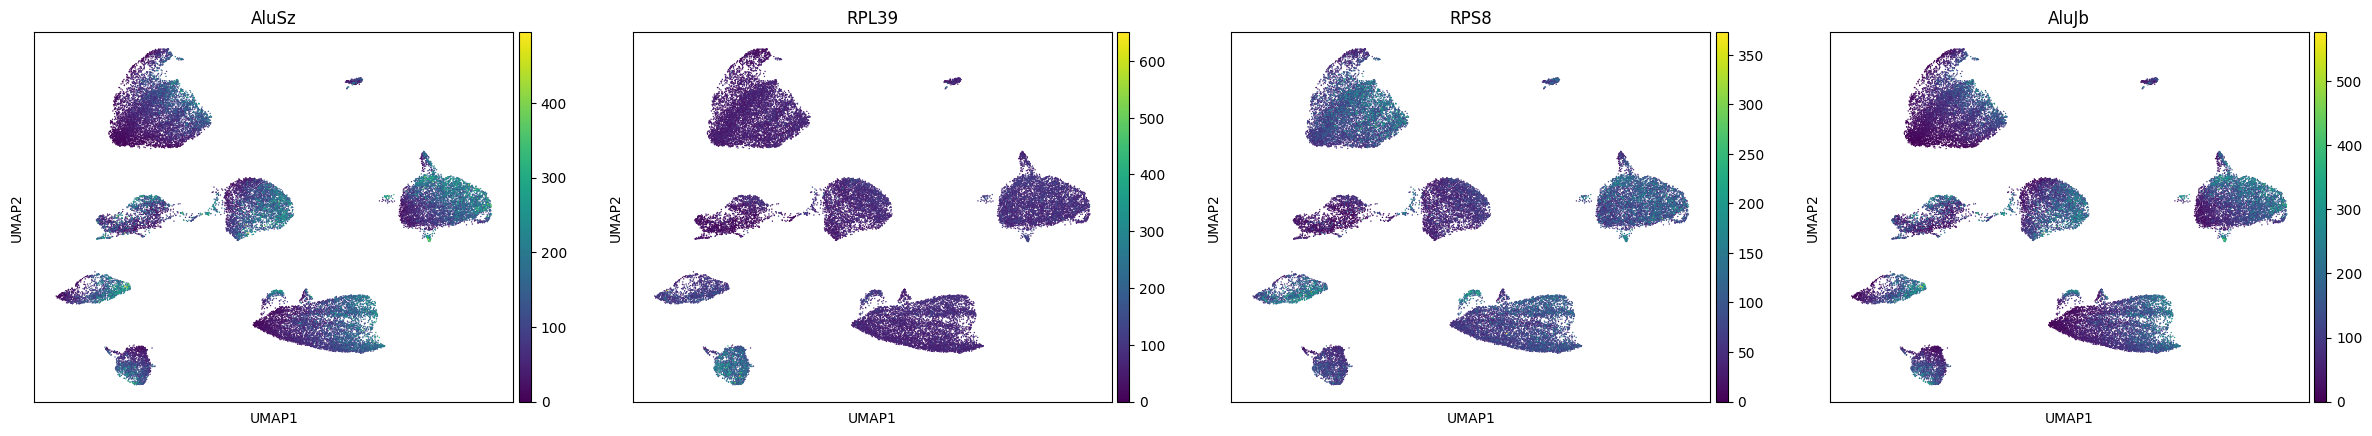

In [18]:
sc.pl.umap(RP.adata, color=['AluSz','RPL39','RPS8','AluJb'], cmap=plt.get_cmap('viridis'))

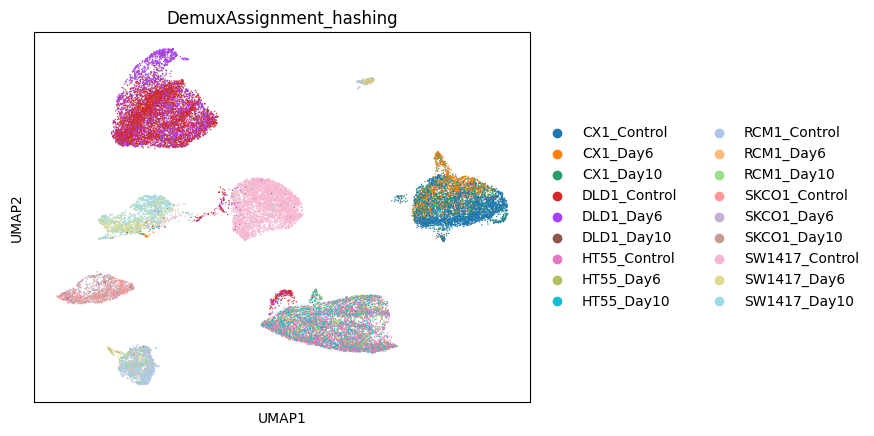

In [19]:
sc.pl.umap(RP.adata, color="DemuxAssignment_hashing")